In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import pearsonr


In [46]:
data = sns.load_dataset('iris')


In [47]:
print("Missing values in the dataset:")
print(data.isnull().sum())

data['species'] = data['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

X = data.drop('species', axis=1)
y = data['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Missing values in the dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


<Figure size 1200x800 with 0 Axes>

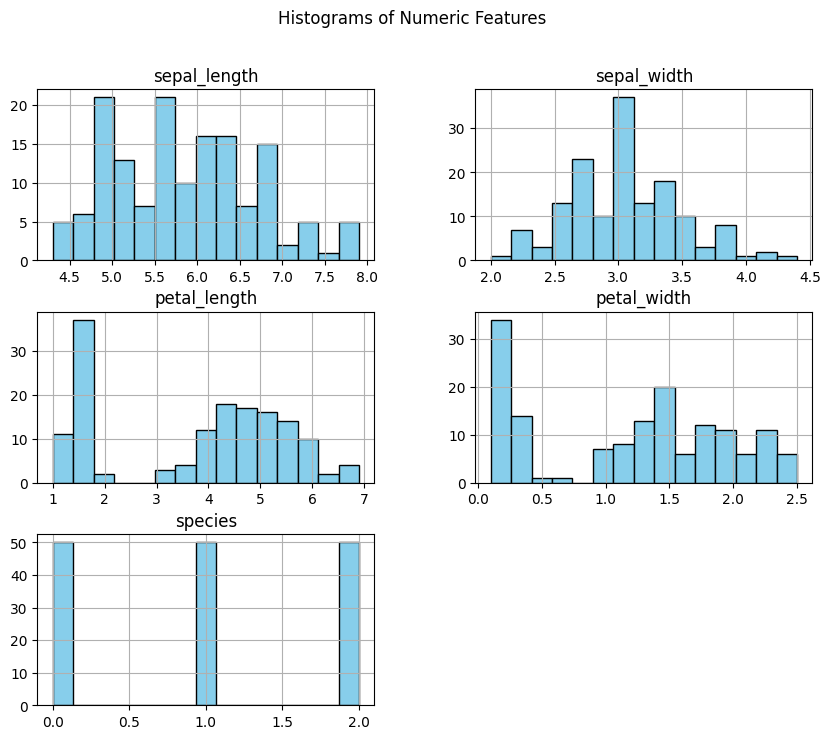

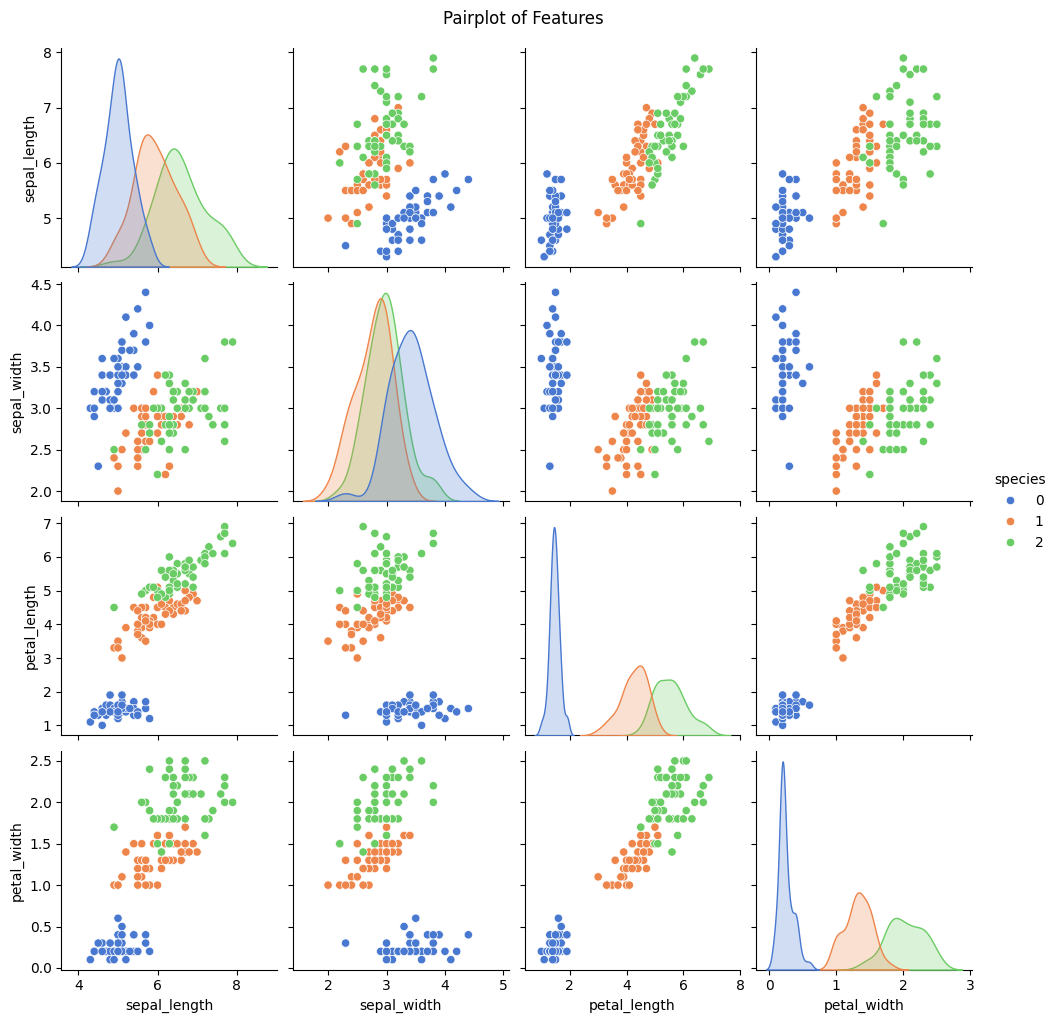

<ipython-input-44-ffe4b85297b3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=data, palette='Set2')


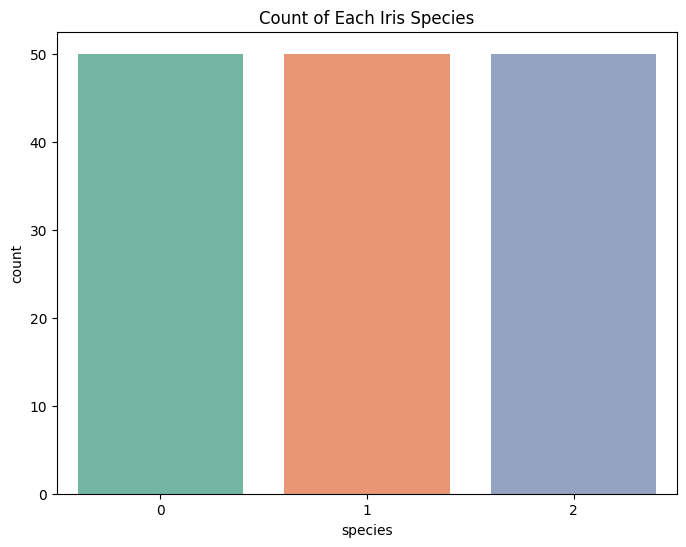

In [44]:
plt.figure(figsize=(12, 8))
data.hist(bins=15, edgecolor='black', color='skyblue', figsize=(10, 8))
plt.suptitle('Histograms of Numeric Features')
plt.show()
sns.pairplot(data, hue="species", palette="muted")
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()
plt.figure(figsize=(8, 6))
sns.countplot(x='species', data=data, palette='Set2')
plt.title('Count of Each Iris Species')
plt.show()


In [51]:

ig_scores = mutual_info_classif(X_train, y_train)
print("\nInformation Gain (IG) scores for each feature:")
ig_scores_df = pd.DataFrame(ig_scores, index=X.columns, columns=['IG Score'])
print(ig_scores_df)

selected_features_ig = ig_scores_df[ig_scores_df['IG Score'] > 0.1].index
print("\nSelected features based on Information Gain (IG):")
print(selected_features_ig)



Information Gain (IG) scores for each feature:
              IG Score
sepal_length  0.470289
sepal_width   0.260816
petal_length  0.975545
petal_width   0.959887

Selected features based on Information Gain (IG):
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [52]:
correlation_matrix = X.corr()
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print("\nHighly correlated features (PCC > 0.9):")
print(correlated_features)
selected_features_pcc = X.columns[~X.columns.isin(correlated_features)]
print("\nSelected features based on Pearson Correlation Coefficient (PCC):")
print(selected_features_pcc)


Highly correlated features (PCC > 0.9):
{'petal_width'}

Selected features based on Pearson Correlation Coefficient (PCC):
Index(['sepal_length', 'sepal_width', 'petal_length'], dtype='object')


In [53]:
X_train_selected = X_train[:, [X.columns.get_loc(col) for col in selected_features_pcc]]
X_test_selected = X_test[:, [X.columns.get_loc(col) for col in selected_features_pcc]]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)
y_pred = rf_model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of Random Forest classifier with selected features: {:.2f}%".format(accuracy * 100))


Accuracy of Random Forest classifier with selected features: 96.67%
